# Machine Learning
## PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.datasets import  load_wine, load_diabetes
from sklearn.model_selection import train_test_split

# Exercise 1
## USArrests data set

In [2]:
df = pd.read_csv('Lab11_usarrests.csv', index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.mean()

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [6]:
df.var()

Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [7]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [8]:
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4'])

In [9]:
pca_loadings

,V1,V2,V3,V4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


##### Fit the PCA model and transform X to get the principal components:

In [10]:
pca = PCA()

In [11]:
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)

In [12]:

df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


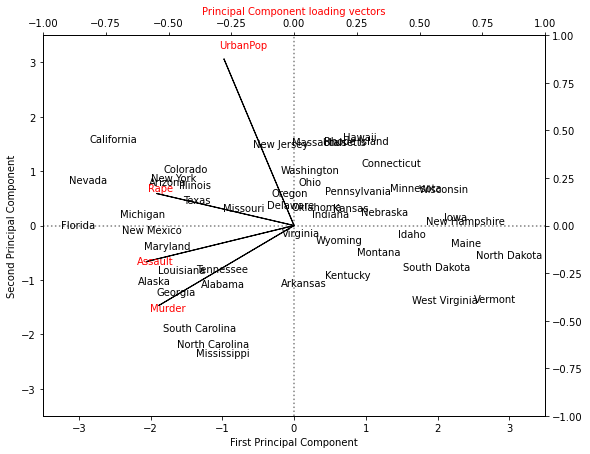

In [13]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
  ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
  ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [14]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x7f2ffcbe79d0>,
 <a list of 4 Text major ticklabel objects>)

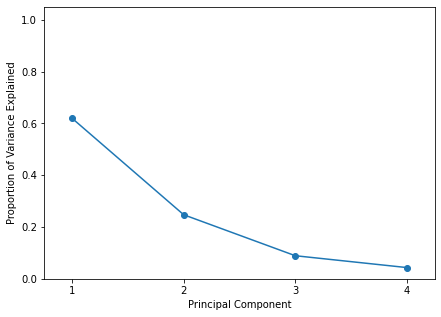

In [15]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

([<matplotlib.axis.XTick at 0x7f2ffcbb5490>,
 <a list of 4 Text major ticklabel objects>)

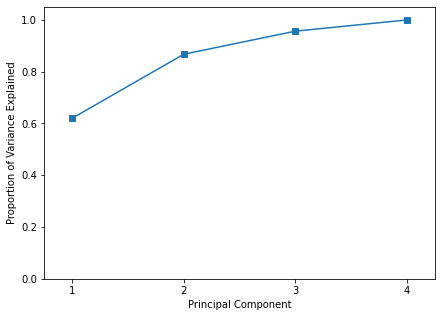

In [16]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

## NCI60 cancer cell line microarray data

In [17]:
df2 = pd.read_csv('Lab11_nci60.csv').drop('Unnamed: 0', axis=1)

In [18]:
df2.columns = np.arange(df2.columns.size)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [20]:
# Read in the labels to check our work later
y = pd.read_csv('Lab11_nci60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [21]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape


(64, 6830)

In [22]:
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

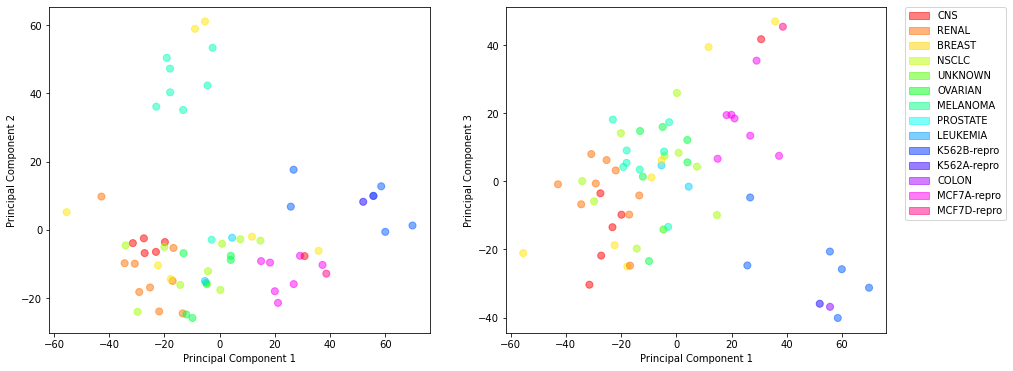

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')
# Custom legend for the classes (y) since we do not create scatter plots per class (which could have their own labels).
handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
  handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))

ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
  ax.set_xlabel('Principal Component 1')

In [24]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).values,
              pca2.explained_variance_ratio_[:5],
              np.cumsum(pca2.explained_variance_ratio_[:5])],
              index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
              columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

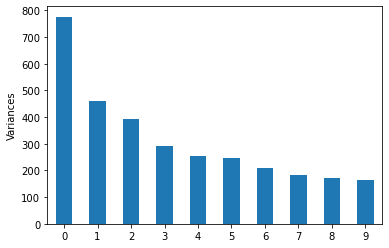

In [25]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

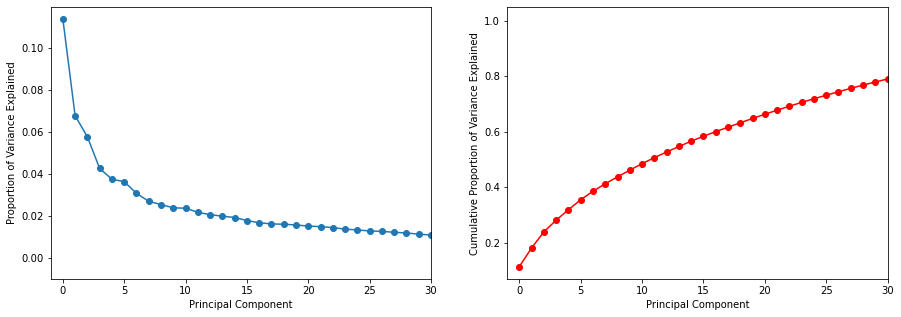

In [26]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)

# Right plot
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
  ax.set_xlabel('Principal Component')
  ax.set_xlim(-1,30)

# Exercise 2
Celem zadanie jest wyznaczenie liczby głównych składowych zachowując kompromis między mocą obliczeniową, a skutecznością klasyfikatora.
Zadanie proszę wykonać na dowolnej bazie danych dostępnej w Pythonie.
Kroki algorytmu:
1. Standaryzacja danych: (convert infs to nans, remove nans, keep only numeric features, scale)
    * Podziel dane na testowe i treningowe (75-25%)
2. Utworzenie macierzy kowariancji
3. Wyznaczenie wektorów własnych macierzy(główne składowe) oraz związane z nimi wartości własnych
4. Uszereguj wartości własne w malejącej kolejności
5. Narysuj wykres współczynników wariancji wyjaśnionej dla wartości własnych
6. Wybierz k największych wektorów na podstawie sparowanych z nimi wartości własnych 

In [27]:
data_diabetes = load_diabetes()

In [28]:
print(data_diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [29]:
df = pd.DataFrame(data_diabetes.data)

In [30]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


## Data standarization

In [31]:
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [32]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [33]:
df.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

In [34]:
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [35]:
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568


In [36]:
y = pd.DataFrame(data_diabetes.target)

In [37]:
y.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


## Train dataset and test dataset

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.25, random_state=42)

## Covariance matrix

In [39]:
cov_matrix = np.cov(X_train)

In [40]:
pd.DataFrame(cov_matrix)

,0,1,2,3,4,5,6,7,8,9,...,321,322,323,324,325,326,327,328,329,330
0,0.764154,0.168358,0.215947,-0.132236,-0.055504,0.000922,-0.120119,0.504287,0.078744,0.379656,...,-0.067690,0.534431,0.199103,0.227546,0.406796,0.083032,0.274918,0.431898,-0.103183,0.465615
1,0.168358,1.084502,0.150204,0.049529,-0.034365,-0.041833,-0.250594,-0.379895,0.016794,-0.007461,...,0.418197,-0.341414,0.055207,0.292212,0.667339,-0.150005,0.070655,0.085973,-0.029609,-0.316205
2,0.215947,0.150204,0.813127,0.087401,0.379372,0.146066,-0.189666,-0.099718,0.115714,0.014258,...,0.223372,0.134694,0.180379,0.111502,0.322507,-0.235924,-0.327614,-0.041546,0.033967,0.302185
3,-0.132236,0.049529,0.087401,0.478565,0.079358,0.030416,0.101316,-0.197989,-0.087030,-0.126585,...,0.038471,-0.580166,0.049531,-0.437479,-0.086258,-0.220107,0.099939,-0.261850,-0.137071,-0.320463
4,-0.055504,-0.034365,0.379372,0.079358,0.662078,0.158971,0.046675,-0.187540,0.236818,-0.183378,...,0.017362,0.189004,0.046622,0.156929,0.079719,0.124899,-0.418760,-0.301062,0.086133,0.363370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0.083032,-0.150005,-0.235924,-0.220107,0.124899,-0.010731,0.121957,0.227577,0.043284,0.000060,...,-0.258249,0.671727,0.054068,0.221935,-0.112482,0.386113,-0.054160,0.125313,0.046805,0.323805
327,0.274918,0.070655,-0.327614,0.099939,-0.418760,-0.105043,0.310617,0.318103,-0.399252,0.245471,...,-0.169340,-0.576352,0.013852,-0.256809,0.302694,-0.054160,0.764597,0.070364,-0.251756,-0.146605
328,0.431898,0.085973,-0.041546,-0.261850,-0.301062,-0.055959,-0.237311,0.416502,0.027986,0.269011,...,-0.051406,0.811555,0.176352,0.198085,-0.013530,0.125313,0.070364,0.580987,0.016841,0.171966
329,-0.103183,-0.029609,0.033967,-0.137071,0.086133,0.038112,-0.134244,-0.079714,0.150959,-0.037407,...,0.093554,0.165399,-0.054355,0.145129,-0.087674,0.046805,-0.251756,0.016841,0.127145,0.038962


## Explained variances

In [41]:
w, v = np.linalg.eig(cov_matrix)

In [42]:
explained_variances = [w_i/np.sum(w) for w_i in w]

In [43]:
explained_variances[:5]

[(0.293986614706857+1.3103010617467362e-33j),
 (0.1965274425079436+8.759246295526086e-34j),
 (0.14860825649191148+6.623483741252836e-34j),
 (0.09659241801127906+4.305133007605312e-34j),
 (0.08376297739871204+3.7333236525084665e-34j)]

## Sort data

In [44]:
sorted_w_v = sorted(zip(w, v), reverse=True)

In [45]:
w_sorted, v_sorted = [ list(storted_touple) for storted_touple in  zip(*sorted_w_v)]

In [46]:
sorted_explained_variances = [w_i/np.sum(w_sorted) for w_i in w_sorted]

## Plot

/home/ayane/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


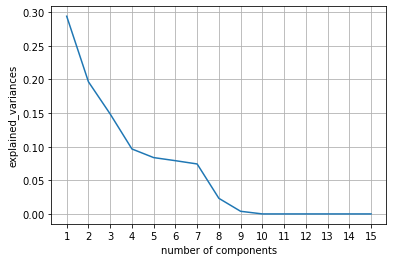

In [47]:
plt.plot(sorted_explained_variances[:15])
plt.grid()
plt.ylabel("explained_variances")
plt.xlabel('number of components')

plt.xticks(range(15), range(1, 16))
plt.show()

#### Check with PCA:

In [48]:
pca = PCA().fit(X_train)

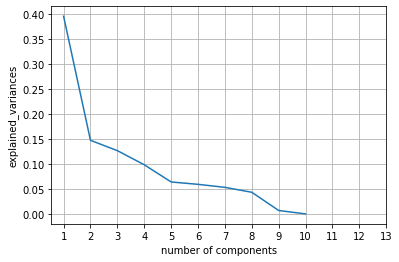

In [49]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.grid()
plt.ylabel("explained_variances")
plt.xticks(range(13), range(1, 14))
plt.show()

## Choose k vectors

In [50]:
k=6

In [51]:
v_sorted[:k]

[array([ 0.04960882+0.j        , -0.00685166+0.j        ,
        -0.10818205+0.j        ,  0.03796886+0.j        ,
         0.00946048+0.j        , -0.01441651+0.j        ,
         0.04920101+0.j        , -0.05081552+0.j        ,
        -0.029816  +0.j        , -0.01377824+0.04488193j,
        -0.01377824-0.04488193j,  0.02920011+0.00156854j,
         0.02920011-0.00156854j,  0.07303176+0.j        ,
         0.02770108-0.00694967j,  0.02770108+0.00694967j,
        -0.04064216-0.0088112j , -0.04064216+0.0088112j ,
         0.01136066-0.00233975j,  0.01136066+0.00233975j,
         0.03368201+0.01863322j,  0.03368201-0.01863322j,
        -0.01435954+0.04793828j, -0.01435954-0.04793828j,
        -0.03541833-0.00178456j, -0.03541833+0.00178456j,
         0.04703324+0.03323407j,  0.04703324-0.03323407j,
         0.00539795-0.00186653j,  0.00539795+0.00186653j,
        -0.06909242+0.j        ,  0.03069219-0.05095469j,
         0.03069219+0.05095469j, -0.07043411+0.00386818j,
        -0.070